<img src='https://www.rc.colorado.edu/sites/all/themes/research/logo.png' style="height:75px">

# Pandas

Manipulating tabular data

## `pandas`

- Provides python a `DataFrame`
- Structured manipulation tools
- Built on top of `numpy`
- Huge growth from 2011-2012
- Very **efficient**
- Great for *medium* data

Resources

- [pandas.pydata.org](http://pandas.pydata.org/)
- [Python for Data Analysis](http://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793) by Wes McKinney
- [Data Wrangling Kung Fu with Pandas](vimeo.com/63295598) by Wes McKinney
- [Cheat sheet](https://s3.amazonaws.com/quandl-static-content/Documents/Quandl+-+Pandas,+SciPy,+NumPy+Cheat+Sheet.pdf) by Quandl

### Why `pandas`?

> 80% of the effort in data analysis is spent cleaning data. [Hadley Wickham](http://vita.had.co.nz/papers/tidy-data.pdf)

Efficency

- Different views of data
- [Tidy data](http://vita.had.co.nz/papers/tidy-data.pdf) by Hadley Wickham

Raw data is often in the wrong format

- How often to you download an array ready for array-oriented computing?
- e.g. `scikit-learn` interface

Storage may be best in a different format

- Sparse representations
- Upload to database



## Outline

**Simple example**

- Reshaping: `pd.pivot` and `pd.melt`
- Many basic operations: add, remove, indexing
- Missing values


### Simple example

Walrus example

In [7]:
import os
import pandas as  pd
import numpy as np

#### Reading in the Walrus data set

In [8]:
filename = os.path.join('Walrus_Data','Walruses.csv')
with open(filename, 'r') as infile:
    print infile.read()


Walrus,DateTimeUTC,Xcoord,Ycoord,Behav,Longitude,Latitude
271,5/31/2008 19:25,"95,616.95","-528,324.60",1.009,-167.9560949,65.24871506
271,6/1/2008 3:24,"84,741.71","-511,653.75",1.0005,-168.1779869,65.40121711
271,6/1/2008 11:24,"71,834.45","-491,176.95",1.00625,-168.4443605,65.58796906
271,6/1/2008 19:24,"65,275.80","-478,935.62",1.02025,-168.5802843,65.6991429
271,6/2/2008 3:24,"69,343.24","-473,948.91",1.00775,-168.4892154,65.74298362
271,6/2/2008 11:24,"72,634.53","-457,308.67",1,-168.4082441,65.89142326
271,6/2/2008 19:24,"73,253.86","-425,586.14",1,-168.3764825,66.17566325
271,6/3/2008 3:24,"79,223.97","-401,784.87",1.00975,-168.2291622,66.38754225
271,6/3/2008 11:24,"77,052.23","-382,920.49",1.20225,-168.2658694,66.5571914
271,6/3/2008 19:24,"73,380.11","-379,615.25",1.24225,-168.3464858,66.58772689
271,6/4/2008 3:24,"67,572.75","-380,607.03",1.2725,-168.4778405,66.5801826
271,6/4/2008 11:24,"62,271.16","-375,738.69",1.2905,-168.5947316,66.6249585
271,6/4/2008 19:24,"59,480.60"

### Creating a `DataFrame`

df = pd.read_csv(filename)
print df


**Why store it this way?**

- Different type
- Different metric

### Converting the DateTimeUTC Column

NumPy datetime64 dtype

In [9]:
df = pd.read_csv(filename)
df['DateTimeUTC'] = pd.to_datetime(df['DateTimeUTC'])
print df

     Walrus         DateTimeUTC       Xcoord       Ycoord    Behav  \
0       271 2008-05-31 19:25:00    95,616.95  -528,324.60  1.00900   
1       271 2008-06-01 03:24:00    84,741.71  -511,653.75  1.00050   
2       271 2008-06-01 11:24:00    71,834.45  -491,176.95  1.00625   
3       271 2008-06-01 19:24:00    65,275.80  -478,935.62  1.02025   
4       271 2008-06-02 03:24:00    69,343.24  -473,948.91  1.00775   
5       271 2008-06-02 11:24:00    72,634.53  -457,308.67  1.00000   
6       271 2008-06-02 19:24:00    73,253.86  -425,586.14  1.00000   
7       271 2008-06-03 03:24:00    79,223.97  -401,784.87  1.00975   
8       271 2008-06-03 11:24:00    77,052.23  -382,920.49  1.20225   
9       271 2008-06-03 19:24:00    73,380.11  -379,615.25  1.24225   
10      271 2008-06-04 03:24:00    67,572.75  -380,607.03  1.27250   
11      271 2008-06-04 11:24:00    62,271.16  -375,738.69  1.29050   
12      271 2008-06-04 19:24:00    59,480.60  -370,911.58  1.29425   
13      271 2008-06-

### Selecting Walrus 281

In [10]:
walrus271 = df.ix[df.Walrus == 271]
walrus281 = df.ix[df.Walrus == 281]
walrus322 = df.ix[df.Walrus == 322]

print walrus281

     Walrus         DateTimeUTC      Xcoord       Ycoord    Behav   Longitude  \
314     281 2008-06-02 02:25:00   65,600.95  -417,464.74  1.54400 -168.541792   
315     281 2008-06-02 10:24:00   61,574.27  -421,676.30  1.56700 -168.633333   
316     281 2008-06-02 18:24:00   56,545.12  -426,070.18  1.62975 -168.746897   
317     281 2008-06-03 02:24:00   52,201.01  -430,192.25  1.70475 -168.844846   
318     281 2008-06-03 10:24:00   46,368.54  -433,462.87  1.82125 -168.975084   
319     281 2008-06-03 18:24:00   46,106.14  -422,837.56  1.84050 -168.977007   
320     281 2008-06-04 02:24:00   49,060.41  -426,577.33  1.80675 -168.912926   
321     281 2008-06-04 10:24:00   49,972.31  -431,150.26  1.73125 -168.894532   
322     281 2008-06-04 18:24:00   42,440.31  -437,859.66  1.71650 -169.063366   
323     281 2008-06-05 02:24:00   43,098.79  -441,156.14  1.69875 -169.049951   
324     281 2008-06-05 10:24:00   45,336.21  -448,162.31  1.62175 -169.003121   
325     281 2008-06-05 18:24

### Reshape with `pivot`

- Question: What is the average behavior for each date?
- How many observations do I have for each Walrus?

In [11]:
walrus_behavior = df.pivot(index='DateTimeUTC', columns='Walrus', values='Behav') #row, column, values (optional)
print walrus_behavior

Walrus                   271      281      322
DateTimeUTC                                   
2008-05-31 19:25:00  1.00900      NaN      NaN
2008-06-01 03:24:00  1.00050      NaN      NaN
2008-06-01 11:24:00  1.00625      NaN      NaN
2008-06-01 19:24:00  1.02025      NaN      NaN
2008-06-02 02:25:00      NaN  1.54400      NaN
2008-06-02 03:24:00  1.00775      NaN      NaN
2008-06-02 10:24:00      NaN  1.56700      NaN
2008-06-02 11:24:00  1.00000      NaN      NaN
2008-06-02 18:24:00      NaN  1.62975      NaN
2008-06-02 19:24:00  1.00000      NaN      NaN
2008-06-03 02:24:00      NaN  1.70475      NaN
2008-06-03 03:24:00  1.00975      NaN      NaN
2008-06-03 10:24:00      NaN  1.82125      NaN
2008-06-03 11:24:00  1.20225      NaN      NaN
2008-06-03 18:24:00      NaN  1.84050      NaN
2008-06-03 19:24:00  1.24225      NaN      NaN
2008-06-04 02:24:00      NaN  1.80675      NaN
2008-06-04 03:24:00  1.27250      NaN      NaN
2008-06-04 10:24:00      NaN  1.73125      NaN
2008-06-04 11

In [12]:
walrus_behavior.index

DatetimeIndex(['2008-05-31 19:25:00', '2008-06-01 03:24:00',
               '2008-06-01 11:24:00', '2008-06-01 19:24:00',
               '2008-06-02 02:25:00', '2008-06-02 03:24:00',
               '2008-06-02 10:24:00', '2008-06-02 11:24:00',
               '2008-06-02 18:24:00', '2008-06-02 19:24:00', 
               ...
               '2009-07-03 20:11:00', '2009-07-04 04:11:00',
               '2009-07-04 12:11:00', '2009-07-04 20:11:00',
               '2009-07-05 04:11:00', '2009-07-05 12:11:00',
               '2009-07-05 20:11:00', '2009-07-06 04:11:00',
               '2009-07-06 12:11:00', '2009-07-06 20:11:00'],
              dtype='datetime64[ns]', name=u'DateTimeUTC', length=454, freq=None, tz=None)

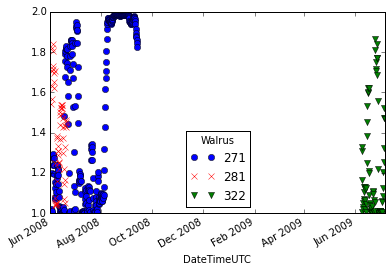

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
walrus_behavior.plot(style=['bo','rx','gv'])

###Columns access

In [14]:
walrus_behavior[322]

DateTimeUTC
2008-05-31 19:25:00        NaN
2008-06-01 03:24:00        NaN
2008-06-01 11:24:00        NaN
2008-06-01 19:24:00        NaN
2008-06-02 02:25:00        NaN
2008-06-02 03:24:00        NaN
2008-06-02 10:24:00        NaN
2008-06-02 11:24:00        NaN
2008-06-02 18:24:00        NaN
2008-06-02 19:24:00        NaN
2008-06-03 02:24:00        NaN
2008-06-03 03:24:00        NaN
2008-06-03 10:24:00        NaN
2008-06-03 11:24:00        NaN
2008-06-03 18:24:00        NaN
2008-06-03 19:24:00        NaN
2008-06-04 02:24:00        NaN
2008-06-04 03:24:00        NaN
2008-06-04 10:24:00        NaN
2008-06-04 11:24:00        NaN
2008-06-04 18:24:00        NaN
2008-06-04 19:24:00        NaN
2008-06-05 02:24:00        NaN
2008-06-05 03:24:00        NaN
2008-06-05 10:24:00        NaN
2008-06-05 11:24:00        NaN
2008-06-05 18:24:00        NaN
2008-06-05 19:24:00        NaN
2008-06-06 02:24:00        NaN
2008-06-06 03:24:00        NaN
                        ...   
2009-06-27 04:11:00    1.84

In [15]:
walrus_behavior[271].values

array([ 1.009  ,  1.0005 ,  1.00625,  1.02025,      nan,  1.00775,
            nan,  1.     ,      nan,  1.     ,      nan,  1.00975,
            nan,  1.20225,      nan,  1.24225,      nan,  1.2725 ,
            nan,  1.2905 ,      nan,  1.29425,      nan,  1.27575,
            nan,  1.23975,      nan,  1.195  ,      nan,  1.1565 ,
            nan,  1.12825,      nan,  1.083  ,      nan,  1.06975,
            nan,  1.08175,      nan,  1.10825,      nan,  1.14575,
            nan,  1.174  ,      nan,  1.1915 ,      nan,  1.238  ,
            nan,  1.239  ,      nan,  1.219  ,      nan,  1.214  ,
            nan,  1.192  ,      nan,  1.1475 ,      nan,  1.1125 ,
            nan,  1.07925,      nan,  1.036  ,      nan,  1.01325,
            nan,  1.00725,      nan,  1.0305 ,      nan,  1.029  ,
            nan,  1.02475,      nan,  1.018  ,      nan,  1.0105 ,
            nan,  1.008  ,      nan,  1.     ,      nan,  1.     ,
            nan,  1.001  ,      nan,  1.03075,      nan,  1.00

###Row access

In [16]:
walrus_behavior.ix[0]

Walrus
271    1.009
281      NaN
322      NaN
Name: 2008-05-31 19:25:00, dtype: float64

In [17]:
walrus_behavior.ix['6/1/2008 11:24']

Walrus
271    1.00625
281        NaN
322        NaN
Name: 2008-06-01 11:24:00, dtype: float64

###Range access

In [18]:
print walrus_behavior.ix[2:4,1:]

Walrus                   271  281  322
DateTimeUTC                           
2008-06-01 11:24:00  1.00625  NaN  NaN
2008-06-01 19:24:00  1.02025  NaN  NaN


How many observations do I have for each model?

In [19]:
walrus_behavior.count(axis=0)

Walrus
271    314
281     55
322     85
dtype: int64

### Plotting the walrus281 behavior

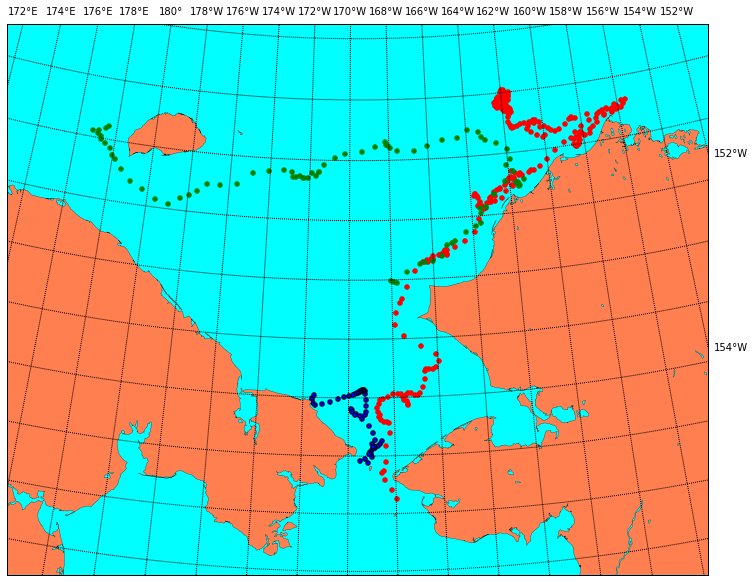

In [22]:
from mpl_toolkits.basemap import Basemap

lons = walrus281.Longitude.values
lats = walrus281.Latitude.values
lons_c=np.average(lons)
lats_c=np.average(lats)
#map = Basemap(projection='mill',llcrnrlon=0,llcrnrlat=-80,urcrnrlon=360,urcrnrlat=80)
map = Basemap(width=1400000,height=1100000,projection='lcc', resolution='h',lat_1=45.,lat_2=55.,lat_0=lats_c+2,lon_0=lons_c)
fig=plt.figure(figsize=(12,9))
ax = fig.add_axes([0.05,0.05,0.9,0.85])
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,2), labels=[False, True, True, False])
map.drawparallels(np.arange(-90,90,1), lables=[True, False, False, True])
x, y = map(lons,lats)
map.scatter(x,y)

# now for walrus 271
lons = walrus271.Longitude.values
lats = walrus271.Latitude.values
x, y = map(lons,lats)
map.scatter(x,y,color='r')

# now for walrus 322
lons = walrus322.Longitude.values
lats = walrus322.Latitude.values
x, y = map(lons,lats)
map.scatter(x,y,color='g')